In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img = cv2.imread('./test_images/onew_04.jpg')
img.shape

(1200, 975, 3)

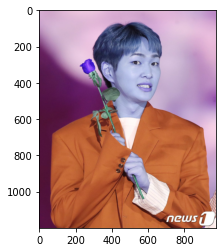

In [3]:
plt.imshow(img)

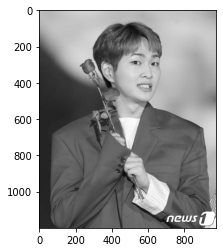

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [30]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 6)
faces

array([[428, 176, 296, 296]], dtype=int32)

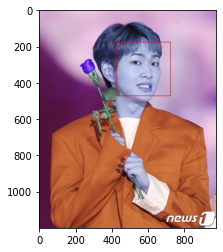

In [8]:
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

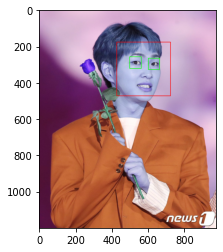

In [9]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 6)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

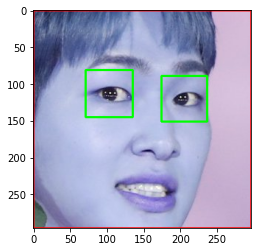

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
cropped_img = np.array(roi_color)

## Preprocession : wavelet transform
wavelet 參考 : https://www.youtube.com/watch?v=xrTor1uw5iI

In [2]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level) # level : Decomposition level

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

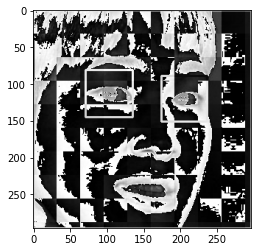

In [12]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [86]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color
    

In [59]:
get_cropped_image_if_2_eyes("./dataset/taemin/tm_075.jpg")

array([[[119, 108, 118],
        [126, 126, 140],
        [119, 127, 144],
        ...,
        [ 84,  73,  83],
        [102,  82,  87],
        [112,  85,  88]],

       [[127, 119, 130],
        [124, 124, 140],
        [119, 129, 147],
        ...,
        [ 77,  68,  78],
        [ 95,  80,  84],
        [108,  84,  86]],

       [[124, 119, 134],
        [113, 115, 133],
        [115, 124, 144],
        ...,
        [ 73,  65,  75],
        [ 93,  79,  85],
        [107,  85,  87]],

       ...,

       [[181, 140, 168],
        [175, 134, 162],
        [168, 127, 154],
        ...,
        [ 53,  52,  56],
        [ 46,  43,  45],
        [ 34,  29,  30]],

       [[180, 139, 167],
        [175, 134, 162],
        [168, 127, 154],
        ...,
        [ 24,  23,  27],
        [ 25,  22,  24],
        [ 27,  22,  24]],

       [[179, 138, 166],
        [173, 132, 160],
        [167, 126, 153],
        ...,
        [ 21,  20,  24],
        [ 32,  31,  35],
        [ 28,  24,  29]]

## 取得所有照片路徑

In [88]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [89]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./dataset/jonghyun',
 './dataset/key',
 './dataset/minho',
 './dataset/onew',
 './dataset/taemin']

In [90]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [91]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        entry = str(entry.path).replace('\\','/')
        roi_color = get_cropped_image_if_2_eyes(entry)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/jonghyun
Generating cropped images in folder:  ./dataset/cropped/key
Generating cropped images in folder:  ./dataset/cropped/minho
Generating cropped images in folder:  ./dataset/cropped/onew
Generating cropped images in folder:  ./dataset/cropped/taemin


In [66]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'jonghyun': ['./dataset/cropped/jonghyun\\jonghyun1.png',
  './dataset/cropped/jonghyun\\jonghyun10.png',
  './dataset/cropped/jonghyun\\jonghyun100.png',
  './dataset/cropped/jonghyun\\jonghyun101.png',
  './dataset/cropped/jonghyun\\jonghyun102.png',
  './dataset/cropped/jonghyun\\jonghyun103.png',
  './dataset/cropped/jonghyun\\jonghyun104.png',
  './dataset/cropped/jonghyun\\jonghyun105.png',
  './dataset/cropped/jonghyun\\jonghyun106.png',
  './dataset/cropped/jonghyun\\jonghyun107.png',
  './dataset/cropped/jonghyun\\jonghyun108.png',
  './dataset/cropped/jonghyun\\jonghyun109.png',
  './dataset/cropped/jonghyun\\jonghyun11.png',
  './dataset/cropped/jonghyun\\jonghyun110.png',
  './dataset/cropped/jonghyun\\jonghyun111.png',
  './dataset/cropped/jonghyun\\jonghyun112.png',
  './dataset/cropped/jonghyun\\jonghyun113.png',
  './dataset/cropped/jonghyun\\jonghyun114.png',
  './dataset/cropped/jonghyun\\jonghyun115.png',
  './dataset/cropped/jonghyun\\jonghyun116.png',
  './dataset

In [95]:
celebrity_file_names_dict

{'jonghyun': ['./dataset/cropped/jonghyun/jonghyun1.png',
  './dataset/cropped/jonghyun/jonghyun2.png',
  './dataset/cropped/jonghyun/jonghyun3.png',
  './dataset/cropped/jonghyun/jonghyun4.png',
  './dataset/cropped/jonghyun/jonghyun5.png',
  './dataset/cropped/jonghyun/jonghyun6.png',
  './dataset/cropped/jonghyun/jonghyun7.png',
  './dataset/cropped/jonghyun/jonghyun8.png',
  './dataset/cropped/jonghyun/jonghyun9.png',
  './dataset/cropped/jonghyun/jonghyun10.png',
  './dataset/cropped/jonghyun/jonghyun11.png',
  './dataset/cropped/jonghyun/jonghyun12.png',
  './dataset/cropped/jonghyun/jonghyun13.png',
  './dataset/cropped/jonghyun/jonghyun14.png',
  './dataset/cropped/jonghyun/jonghyun15.png',
  './dataset/cropped/jonghyun/jonghyun16.png',
  './dataset/cropped/jonghyun/jonghyun17.png',
  './dataset/cropped/jonghyun/jonghyun18.png',
  './dataset/cropped/jonghyun/jonghyun19.png',
  './dataset/cropped/jonghyun/jonghyun20.png',
  './dataset/cropped/jonghyun/jonghyun21.png',
  './datas

In [93]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'jonghyun': 0, 'key': 1, 'minho': 2, 'onew': 3, 'taemin': 4}

## 變成 model 可 train 維度 (將每個檔案w2d後reshape成一n*1)

In [96]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if(img is not None):
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img,'db1',5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
            X.append(combined_img) # 上面放彩色的 face 照，下面放 w2d 的 face 照
            y.append(class_dict[celebrity_name]) # y : 類別 {'jonghyun': 0, 'key': 1, 'minho': 2, 'onew': 3, 'taemin': 4}

In [97]:
len(X) # 共 189 張圖，每張有上 32*32*3.下 32*32 兩張

1040

In [98]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1040, 4096)

## 開始 train model ，用 SVM 方法分類 (可高維)

In [99]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

sklearn.pipeline :<br>
Pipeline 類可以將多個處理步驟合併（glue）為單個scikit-learn 估計器。Pipeline 類本身具有fit、predict 和score 方法，其行為與scikit-learn 中的其他模型相同。Pipeline 類最常見的用例是將預處理步驟（比如數據縮放）與一個監督模型（比如分類器）連結在一起。<br>
**svc** <br>
kernel:函數(預設且常用 rbf:radial basis function)
c : 懲罰參數，越高對分類錯誤的懲罰越大

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.676923076923077

太低了吧笑死 XDD

In [101]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.79      0.67        43
           1       0.71      0.70      0.70        76
           2       0.69      0.67      0.68        51
           3       0.73      0.63      0.67        59
           4       0.69      0.58      0.63        31

    accuracy                           0.68       260
   macro avg       0.68      0.67      0.67       260
weighted avg       0.69      0.68      0.68       260



In [102]:
len(X_train),len(X_test)

(780, 260)

## GridSearch CV

In [103]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [104]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [105]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.632051,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.452564,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.598718,{'logisticregression__C': 1}


In [106]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [107]:
best_estimators['svm'].score(X_test,y_test)

0.6538461538461539

In [108]:
best_estimators['random_forest'].score(X_test,y_test)

0.5038461538461538

In [109]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.6384615384615384

In [110]:
best_clf = best_estimators['svm'] # 選 val 成績最好的分類器

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[32,  8,  1,  0,  2],
       [12, 45,  6,  5,  8],
       [ 1,  1, 35,  9,  5],
       [ 8,  5,  9, 36,  1],
       [ 6,  0,  2,  1, 22]], dtype=int64)

Text(69.0, 0.5, 'Truth')

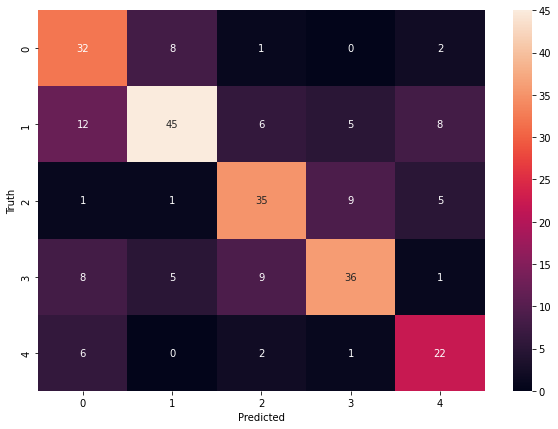

In [112]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## save the trained model

In [113]:
# !pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [114]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))